# 目的
- 最適化問題の例題を解く
- 参考にしたwebサイト
    - https://qiita.com/SaitoTsutomu/items/bfbf4c185ed7004b5721

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 典型問題の例
## ナップサック問題

In [2]:
from ortoolpy import knapsack
size = [21, 11, 15, 9, 34, 25, 41, 52]
weight = [22, 12, 16, 10, 35, 26, 42, 53]
capacity = 100

ret = knapsack(size, weight, capacity)
print(ret)

(105.0, [0, 1, 3, 4, 5])


## 最短経路問題

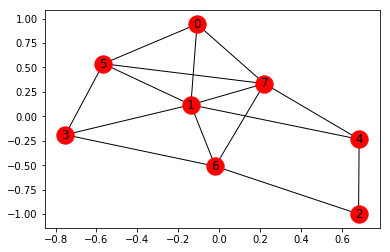

[0, 1, 4, 2]

In [3]:
import networkx as nx
g = nx.fast_gnp_random_graph(8, 0.46, 1)
nx.draw_networkx(g)
plt.show()

nx.dijkstra_path(g, 0, 2)

# 汎用問題の実行例

## ナップサック問題

In [4]:
from pulp import *

In [12]:
size = [21, 11, 15, 9, 34, 25, 41, 52]
weight = [22, 12, 16, 10, 35, 26, 42, 53]
capacity = 100
r = range(len(size))

m = LpProblem(name='NapsackProblem', sense=LpMaximize) # 数理モデル、最大化する場合

# 線形計画で使う変数を作る
x = [LpVariable(name='x%d'%i, cat=LpBinary) for i in r] # 変数
# 大量の変数がある場合には、pulp.LpVariable.dictsを使う
# ## https://qiita.com/mzmttks/items/82ea3a51e4dbea8fbc17

# 目的関数は変数を使って式を作り、それを数理モデルオブジェクトに足す
m += lpDot(weight, x) # 目的関数
#print(m)

# 制約条件も変数を使って式をつくり、数理モデルに足していく
m += lpDot(size, x) <= capacity # 制約
print(m)

status = m.solve()
print("status : ", LpStatus[status])
print((value(m.objective), [i for i in r if value(x[i]) > 0.5]))

NapsackProblem:
MAXIMIZE
22*x0 + 12*x1 + 16*x2 + 10*x3 + 35*x4 + 26*x5 + 42*x6 + 53*x7 + 0
SUBJECT TO
_C1: 21 x0 + 11 x1 + 15 x2 + 9 x3 + 34 x4 + 25 x5 + 41 x6 + 52 x7 <= 100

VARIABLES
0 <= x0 <= 1 Integer
0 <= x1 <= 1 Integer
0 <= x2 <= 1 Integer
0 <= x3 <= 1 Integer
0 <= x4 <= 1 Integer
0 <= x5 <= 1 Integer
0 <= x6 <= 1 Integer
0 <= x7 <= 1 Integer

status :  Optimal
(105.0, [0, 1, 3, 4, 5])


## 最短経路問題
- 変数x：経路に含むか否かを示す（経路に含まれる=1、含まれない=0）
-　制約条件
    -　Sum(x_{i,j})-Sum(x_{k,i}) = {1(i=start),-1(i=end),0(other)}
    - この条件は、中間ノードはエッジの入りと出が同数になるので0になり、
    - 端のノードは偏ることを表している

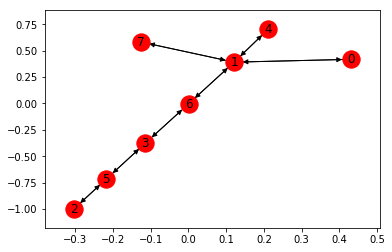

MinimumPath:
MINIMIZE
1*x_0 + 1*x_1 + 1*x_10 + 1*x_11 + 1*x_12 + 1*x_13 + 1*x_2 + 1*x_3 + 1*x_4 + 1*x_5 + 1*x_6 + 1*x_7 + 1*x_8 + 1*x_9 + 0
SUBJECT TO
_C1: x_0 - x_1 = 1

_C2: - x_0 + x_1 - x_11 - x_13 + x_2 + x_3 + x_4 - x_8 = 0

_C3: x_5 - x_9 = -1

_C4: - x_10 - x_12 + x_6 + x_7 = 0

_C5: - x_2 + x_8 = 0

_C6: x_10 - x_5 - x_6 + x_9 = 0

_C7: x_11 + x_12 - x_3 - x_7 = 0

_C8: x_13 - x_4 = 0

VARIABLES
x_0 <= 1 Continuous
x_1 <= 1 Continuous
x_10 <= 1 Continuous
x_11 <= 1 Continuous
x_12 <= 1 Continuous
x_13 <= 1 Continuous
x_2 <= 1 Continuous
x_3 <= 1 Continuous
x_4 <= 1 Continuous
x_5 <= 1 Continuous
x_6 <= 1 Continuous
x_7 <= 1 Continuous
x_8 <= 1 Continuous
x_9 <= 1 Continuous

status :  Optimal
[(0, 1), (1, 6), (3, 5), (5, 2), (6, 3)]


In [54]:
g = nx.fast_gnp_random_graph(8, 0.26, 1).to_directed()
nx.draw_networkx(g)
plt.show()

source, sink = 0, 2  # 始点, 終点
r = list(g.edges())

# 数理モデル
m = LpProblem(name='MinimumPath')  # defaultで最小化

# 変数作成
x = LpVariable.dicts('x', np.arange(len(r)), 0, 1, 'Continuous')
# x = [LpVariable('x%d'%k, lowBound=0, upBound=1) for k, (i, j) in r] # 変数(路に入るかどうか)

# 目的関数
m += lpSum(x) # 全てのエッジのコストは同一とした場合

# 制約
for nd in g.nodes():
    m += lpSum(x[k] for k, (i, j) in zip(np.arange(len(r)), r) if i == nd) \
        == lpSum(x[k] for k, (i, j) in zip(np.arange(len(r)), r) if j == nd) + {source: 1, sink: -1}.get(nd, 0)  # 制約
print(m)

status = m.solve()
print("status : ", LpStatus[status])
print([(i, j) for k, (i, j) in zip(np.arange(len(r)), r) if value(x[k]) > 0.5])